# Create light curves using _citlalicue_
## Oscar Barragán, June 2020

### Load basic libraries

In [1]:
#Load libraries
from __future__ import print_function, division, absolute_import
import numpy as np
import matplotlib.pyplot as plt
import sys
from numpy.random import multivariate_normal
from scipy.spatial.distance import cdist
import os
import glob
from scipy.interpolate import interp1d
#Import the light_curve class from citlalicue
from citlalicue import light_curve

### Create light curve

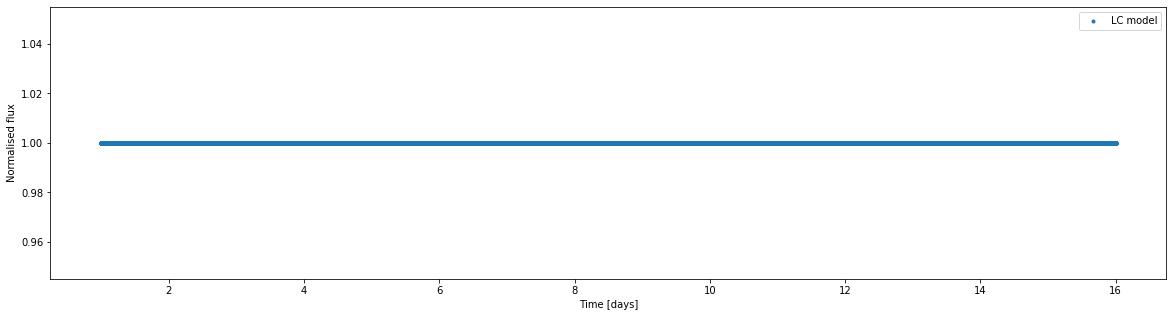

In [2]:
#We need to define a time vector to create the light curve
#In this case we are going to generate a 90 days light curve with a cadence of 25 secs

#We will create an observation each cadence time
#cadence = 60/1./24.
#t = np.linspace(0,90,int(1/cadence))

#start a random seed number
seed = 28
np.random.seed(seed)

#Let us create a light curve instance
lc = light_curve(tmin=1,tmax=16) 

#as it is now, the lc instance corresponds to the light curve of a uniform disc star
#let us plot it to see this
lc.plot(fsx=20,fsy=5)

### Let us add some transits to the light curve

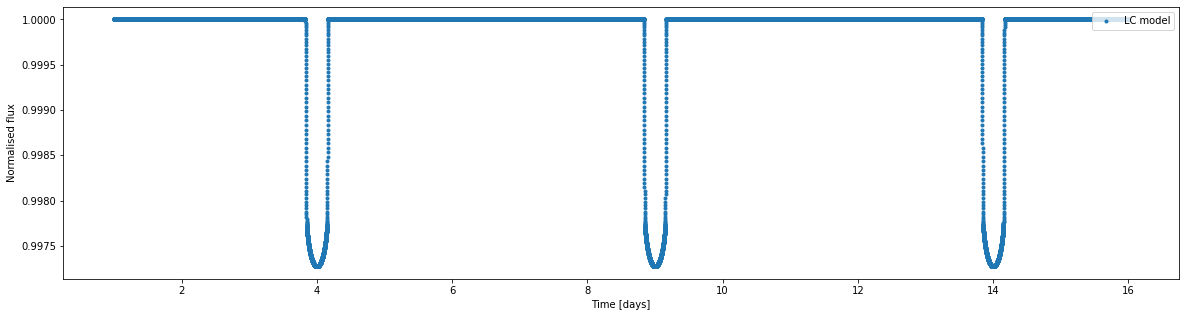

In [3]:
#We need to specify the parameters
#T0 time of periastron
#P orbital period
#b impact parameter
#rho stellar density
#rp planet radius scaled to the radius of the star
#u1 linear limb darkening coefficient
#u2 quadratic limb darkening coefficient

T0 = 4.
P  = 5.
b  = 0.
a  = 5
rp = 0.05
u1 = 0.25
u2 = 0

#Let us create a list with all the planet parameters
planet_parameters = [T0,P,b,a,rp,u1,u2]

#Let us add the planet by calling the add_transits method
lc.add_transits(planet_parameters=planet_parameters,planet_name='b')

#re-plot the light curve to see the planets
lc.plot(fsx=20,fsy=5)

### Let us add some other transits to the light curve

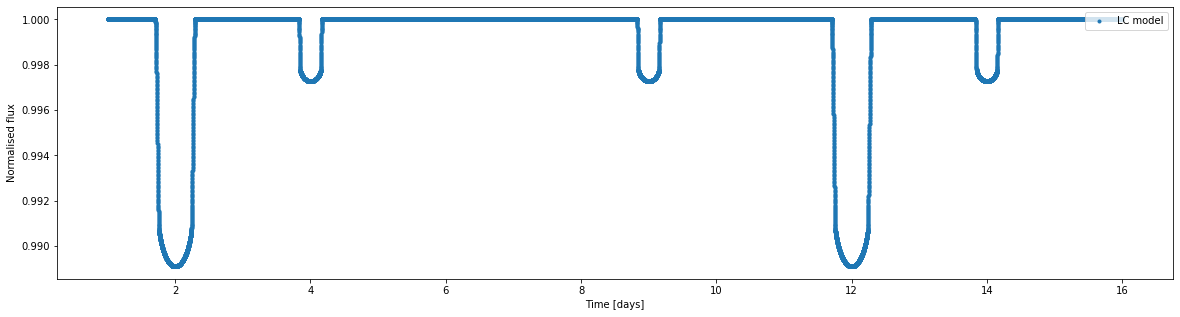

In [4]:
#We need to specify the parameters
#T0 time of periastron
#P orbital period
#b impact parameter
#rho stellar density
#rp planet radius scaled to the radius of the star
#u1 linear limb darkening coefficient
#u2 quadratic limb darkening coefficient

T0 = 2.
P  = 10.
b  = 0.
a  = 6
rp = 0.1
u1 = 0.25
u2 = 0

#Let us create a list with all the planet parameters
planet_parameters = [T0,P,b,a,rp,u1,u2]

#Let us add the planet by calling the add_transits method
lc.add_transits(planet_parameters=planet_parameters,planet_name='c')

#re-plot the light curve to see the planets
lc.plot(fsx=20,fsy=5)

### Let us add some spots (Using a QP kernel)

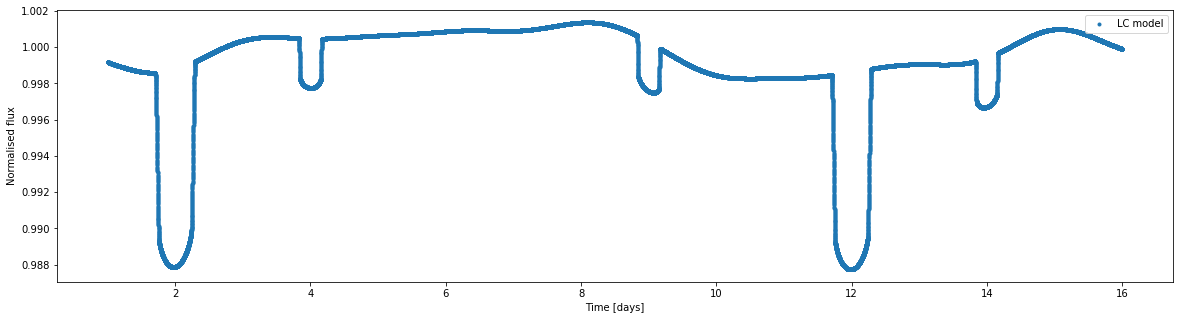

In [5]:
#In this case, we just need to call the add_spots method
lc.add_spots(QP=[1e-6,10,0.3,10])

#re-plot the light curve
lc.plot(20,5)

### Add white noise

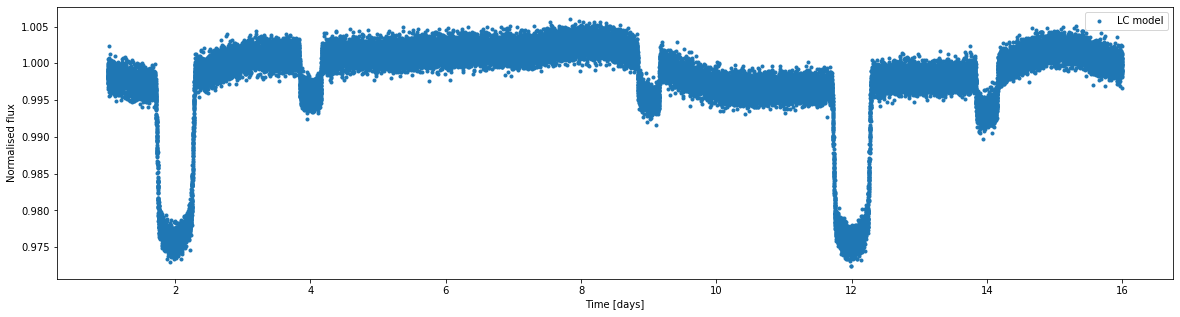

In [6]:
#Define the error bar that we want to add
error_bar = 1000e-6

#Call the add_white_noise attribute
lc.add_white_noise(std=error_bar)

#and plot
lc.plot(20,5)